In [21]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


In [22]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [23]:
print('X-train shape: ',X_train.shape)
print('y-train shape: ',y_train.shape)
print('X-test shape: ',X_test.shape)
print('y-test shape: ',y_test.shape)

X-train shape:  (60000, 28, 28)
y-train shape:  (60000,)
X-test shape:  (10000, 28, 28)
y-test shape:  (10000,)


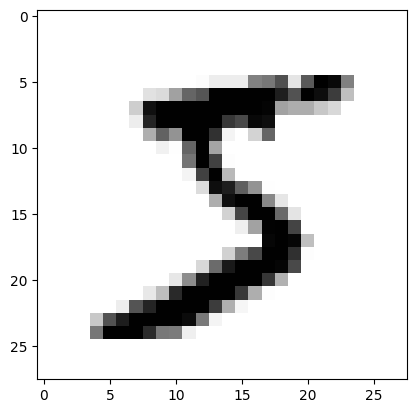

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(X_train[0],cmap='binary')
plt.show()

In [25]:
y_train[0]

np.uint8(5)

In [26]:
print(set(y_train))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


In [27]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [28]:
print('y-train-encoded shape: ',y_train_encoded.shape)
print('y-test-encooded shape: ',y_test_encoded.shape)

y-train-encoded shape:  (60000, 10)
y-test-encooded shape:  (10000, 10)


In [29]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [30]:
import numpy as np
X_train_reshaped=np.reshape(X_train,(60000,784))
X_test_reshaped=np.reshape(X_test,(10000,784))

print('X_train_reshaped shape: ' ,X_train_reshaped.shape)
print('X_test_reshaped shape: ' ,X_test_reshaped.shape)

X_train_reshaped shape:  (60000, 784)
X_test_reshaped shape:  (10000, 784)


In [31]:
print(set(X_train_reshaped[0]))

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(9), np.uint8(11), np.uint8(14), np.uint8(16), np.uint8(18), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(30), np.uint8(35), np.uint8(36), np.uint8(39), np.uint8(43), np.uint8(45), np.uint8(46), np.uint8(49), np.uint8(55), np.uint8(56), np.uint8(64), np.uint8(66), np.uint8(70), np.uint8(78), np.uint8(80), np.uint8(81), np.uint8(82), np.uint8(90), np.uint8(93), np.uint8(94), np.uint8(107), np.uint8(108), np.uint8(114), np.uint8(119), np.uint8(126), np.uint8(127), np.uint8(130), np.uint8(132), np.uint8(133), np.uint8(135), np.uint8(136), np.uint8(139), np.uint8(148), np.uint8(150), np.uint8(154), np.uint8(156), np.uint8(160), np.uint8(166), np.uint8(170), np.uint8(171), np.uint8(172), np.uint8(175), np.uint8(182), np.uint8(183), np.uint8(186), np.uint8(187), np.uint8(190), np.uint8(195), np.uint8(198), np.uint8(201), np.uint8(205), np.uint8(207), np.uint8(212), np.uint8(213), np.uint8(219), np.

In [32]:
x_mean=np.mean(X_train_reshaped)
x_std=np.std(X_train_reshaped)

epsilon=1e-10
X_train_norm=(X_train_reshaped-x_mean)/(x_std+epsilon)
X_test_norm=(X_test_reshaped-x_mean)/(x_std+epsilon)

In [33]:
print(set(X_train_norm[0]))

{np.float64(-0.38589016215482896), np.float64(1.306921966983251), np.float64(1.17964285952926), np.float64(1.803310486053816), np.float64(1.6887592893452241), np.float64(2.8215433456857437), np.float64(2.719720059722551), np.float64(1.1923707702746593), np.float64(1.7396709323268205), np.float64(2.057868700961798), np.float64(2.3633385588513764), np.float64(2.096052433197995), np.float64(1.7651267538176187), np.float64(2.7960875241949457), np.float64(2.7451758812133495), np.float64(2.45243393406917), np.float64(0.02140298169794222), np.float64(-0.22042732246464067), np.float64(1.2305545025108566), np.float64(0.2759611966059242), np.float64(2.210603629906587), np.float64(2.6560805059955555), np.float64(2.6051688630139593), np.float64(-0.4240738943910262), np.float64(0.4668798577869107), np.float64(0.1486820891519332), np.float64(0.3905123933145161), np.float64(1.0905474843114664), np.float64(-0.09314821501064967), np.float64(1.4851127174188385), np.float64(2.7579037919587486), np.float6

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(128, activation='relu',input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [35]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(X_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8128 - loss: 0.6227
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9427 - loss: 0.1943
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9591 - loss: 0.1410


In [37]:
_,accuracy=model.evaluate(X_test_norm,y_test_encoded)
print('Test set accuracy:', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1479
Test set accuracy: 96.07999920845032


In [38]:
preds=model.predict(X_test_norm)
print('Shape of preds: ',preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of preds:  (10000, 10)


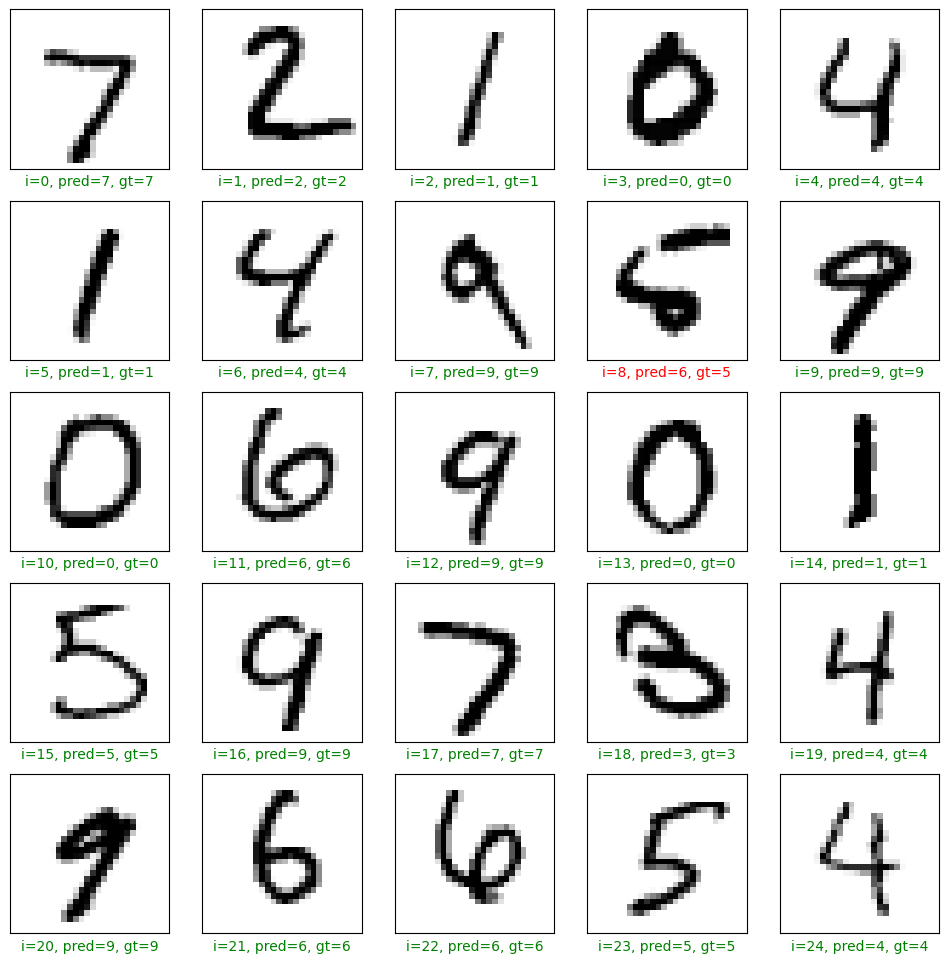

In [39]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    col='g'
    if pred!=gt:
        col='r'
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(X_test[start_index+i],cmap='binary')
plt.show()

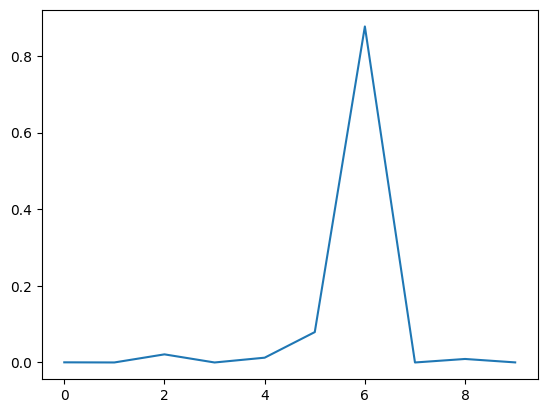

In [40]:
plt.plot(preds[8])
plt.show()